In [3]:
#Importing modules and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("bank_transactions.csv")
# 

In [4]:
#Cleaning data
data.drop(["TransactionID"],axis=1,inplace=True)
custgender_mode = data.CustGender.mode().values[0]

data.CustGender.fillna(custgender_mode,inplace=True)
custlocation_mode = data.CustLocation.mode().values[0]
data.CustLocation.fillna(custlocation_mode,inplace=True)
custAB_median = data.CustAccountBalance.median()
data.CustAccountBalance.fillna(custAB_median,inplace=True)

data[["Birthdate", "Birthmonth", "Birthyear"]] = data["CustomerDOB"].str.split("/", expand = True)
data[["Tdate", "Tmonth", "Tyear"]] = data["TransactionDate"].str.split("/", expand = True)

data.Birthyear.fillna(data.Birthyear.median(),inplace=True)
age = []
difference = 0
for i in data.Birthyear.values:
    if int(i) < 16:
        difference = 16 - int(i)
    elif int(i) == 1800: #one observation with Birthyear 1800
        difference = 216
    else:
        difference = 100 - int(i) + 16
    age.append(difference)

data["Age"] = age

data[["Birthdate", "Birthmonth", "Birthyear"]] = data[["Birthdate", "Birthmonth", "Birthyear"]].astype(float)
data[["Tdate", "Tmonth", "Tyear"]] = data[["Tdate", "Tmonth", "Tyear"]].astype(float)

time = []
for i in data.TransactionTime.values:
    hour = i//10000
    time.append(hour)

data["TransactionHour"] = time

data.drop(["CustomerDOB"],inplace=True,axis=1)
data.drop(["TransactionDate"],inplace=True,axis=1)
data.drop(["TransactionTime"],inplace=True,axis=1)

In [5]:
data

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Birthdate,Birthmonth,Birthyear,Tdate,Tmonth,Tyear,Age,TransactionHour
0,C5841053,F,JAMSHEDPUR,17819.05,25.0,10.0,1.0,94.0,2.0,8.0,16.0,22,14
1,C2142763,M,JHAJJAR,2270.69,27999.0,4.0,4.0,57.0,2.0,8.0,16.0,59,14
2,C4417068,F,MUMBAI,17874.44,459.0,26.0,11.0,96.0,2.0,8.0,16.0,20,14
3,C5342380,F,MUMBAI,866503.21,2060.0,14.0,9.0,73.0,2.0,8.0,16.0,43,14
4,C9031234,F,NAVI MUMBAI,6714.43,1762.5,24.0,3.0,88.0,2.0,8.0,16.0,28,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,C8020229,M,NEW DELHI,7635.19,799.0,8.0,4.0,90.0,18.0,9.0,16.0,26,18
1048563,C6459278,M,NASHIK,27311.42,460.0,20.0,2.0,92.0,18.0,9.0,16.0,24,18
1048564,C6412354,M,HYDERABAD,221757.06,770.0,18.0,5.0,89.0,18.0,9.0,16.0,27,18
1048565,C6420483,M,VISAKHAPATNAM,10117.87,1000.0,30.0,8.0,78.0,18.0,9.0,16.0,38,18


In [6]:
#-----------------------------------KMeans Clustering Algorithm --------------------------

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_df = pd.DataFrame(data, columns=['CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'Tmonth', 'TransactionHour'])

X = data_df[['CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'Tmonth', 'TransactionHour']].values

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=44)
kmeans.fit(scaled_features)  
data['cluster'] = kmeans.labels_     # adding a variable called "cluster" that contains the k-means labels

Text(0, 0.5, 'Transaction Amount')

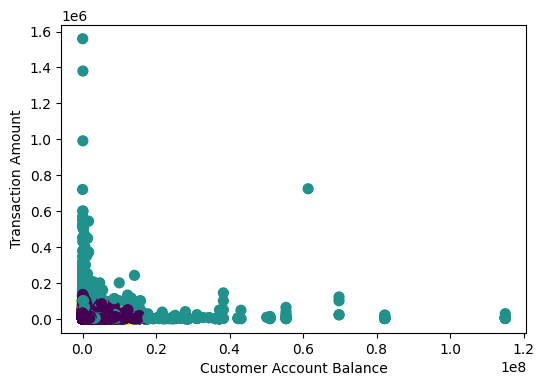

In [8]:
# CustAccountBalance vs Transaction Amount

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['CustAccountBalance'], 
           data_df['TransactionAmount (INR)'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Customer Account Balance")
ax.set_ylabel("Transaction Amount")

Text(0, 0.5, 'Transaction Month')

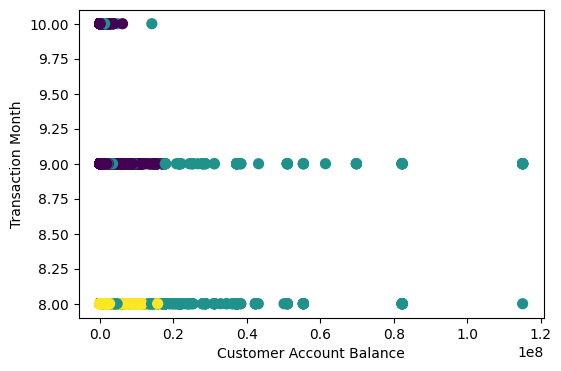

In [9]:
#CustAccountBalance vs Transaction Month

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['CustAccountBalance'], 
           data_df['Tmonth'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Customer Account Balance")
ax.set_ylabel("Transaction Month")

Text(0, 0.5, 'Transaction Month')

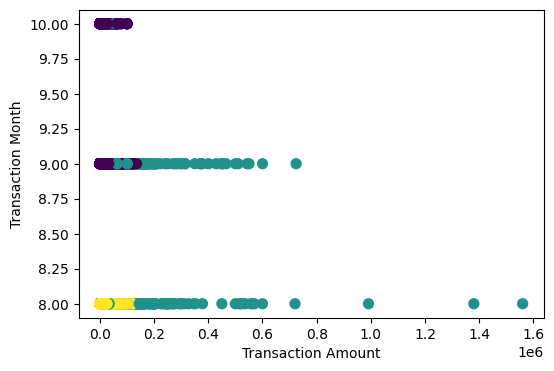

In [10]:
#Transaction Amount vs Transaction Month

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['TransactionAmount (INR)'], 
           data_df['Tmonth'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Transaction Month")

Text(0, 0.5, 'Transaction Hour')

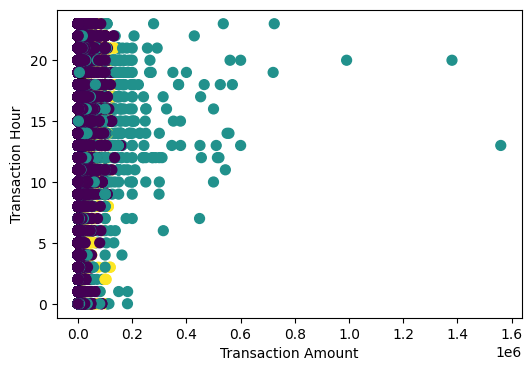

In [11]:
#Transaction Amount vs Transaction Hour

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['TransactionAmount (INR)'], 
           data_df['TransactionHour'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Transaction Hour")

Text(0, 0.5, 'Transaction Hour')

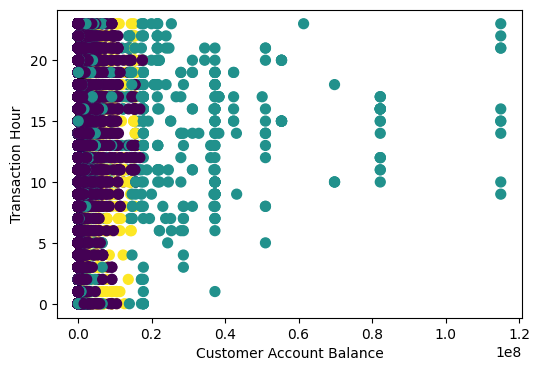

In [12]:
#CustAccountBalance vs Transaction Hour

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['CustAccountBalance'], 
           data_df['TransactionHour'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Customer Account Balance")
ax.set_ylabel("Transaction Hour")

Text(0, 0.5, 'Age')

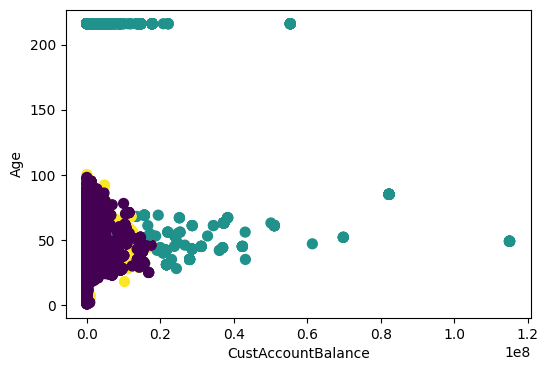

In [13]:
#CustAccountBalance vs Age

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['CustAccountBalance'], 
           data_df['Age'],  
           c = data['cluster'], s=50)
ax.set_xlabel("CustAccountBalance")
ax.set_ylabel("Age")

Text(0, 0.5, 'Age')

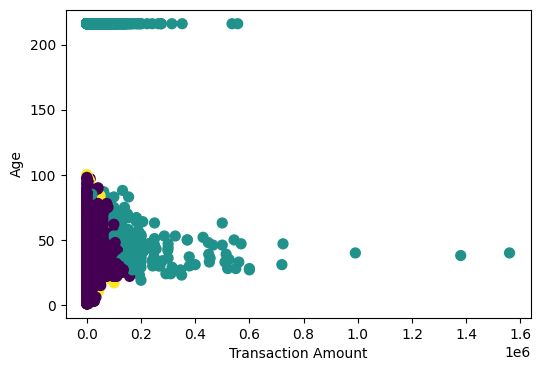

In [14]:
#Transaction Amount vs Age

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['TransactionAmount (INR)'], 
           data_df['Age'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Age")

Text(0, 0.5, 'Transaction Hour')

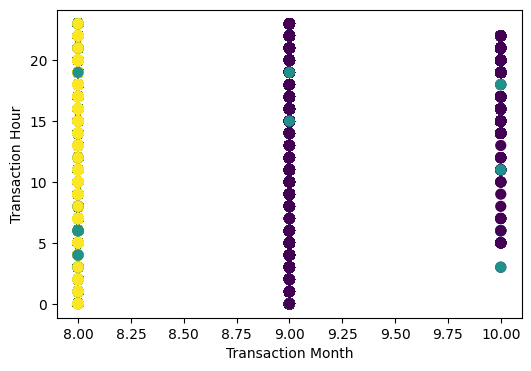

In [15]:
#Transaction Month vs Transaction Hour

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['Tmonth'], 
           data_df['TransactionHour'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Transaction Month")
ax.set_ylabel("Transaction Hour")

Text(0, 0.5, 'Age')

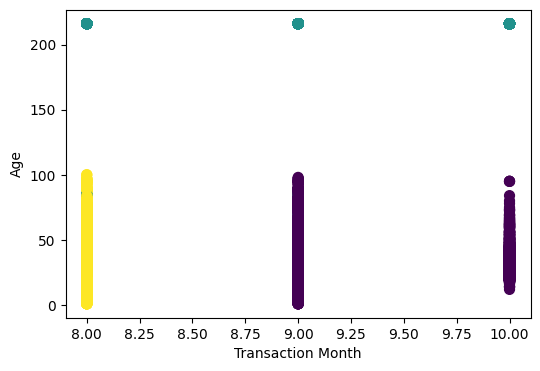

In [16]:
#Transaction Month vs Age

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['Tmonth'], 
           data_df['Age'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Transaction Month")
ax.set_ylabel("Age")

Text(0, 0.5, 'Age')

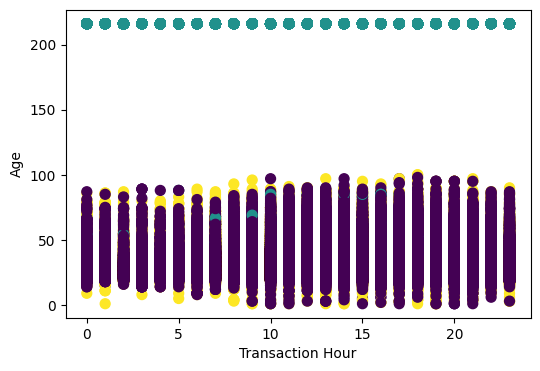

In [17]:
#Transaction Hour vs Age

ax = plt.figure(figsize=(6,4)).add_subplot(111)
ax.scatter(data_df['TransactionHour'], 
           data_df['Age'],  
           c = data['cluster'], s=50)
ax.set_xlabel("Transaction Hour")
ax.set_ylabel("Age")

In [18]:
#--------------------------------DBSCAN Clustering Algorithm -------------------------------------

In [19]:
from sklearn.cluster import DBSCAN

# Scaling the data
X = X.astype('float32')
X_df = pd.DataFrame(X)
X_sample = X_df.sample(n=50000)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_sample)

# Perform DBSCAN clustering
epsilon = 3  # The maximum distance between samples to be considered in the same neighborhood
min_samples = 10  # The minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data)

X_sample['DBSCAN Cluster'] = clusters

# 

In [20]:
X_sample.rename(columns={'0': 'CustAccountBalance', '1': 'TransactionAmount (INR)', '2': 'Age', '3': 'Tmonth', '4': 'TransactionHour'}, inplace=True)
X_sample

,0,1,2,3,4,DBSCAN Cluster
461692,2610.149902,400.0,30.0,8.0,15.0,0
64265,402.750000,4841.0,23.0,8.0,6.0,0
947947,36890.609375,1365.0,27.0,9.0,20.0,0
161811,764383.250000,1916.0,39.0,8.0,22.0,0
613449,7235.970215,10.0,25.0,8.0,7.0,0
...,...,...,...,...,...,...
756531,157879.796875,1683.0,34.0,9.0,17.0,0
684263,15.630000,20.0,23.0,8.0,23.0,0
227302,304106.218750,2987.0,34.0,8.0,14.0,0
728775,8172.779785,1050.0,31.0,9.0,12.0,0


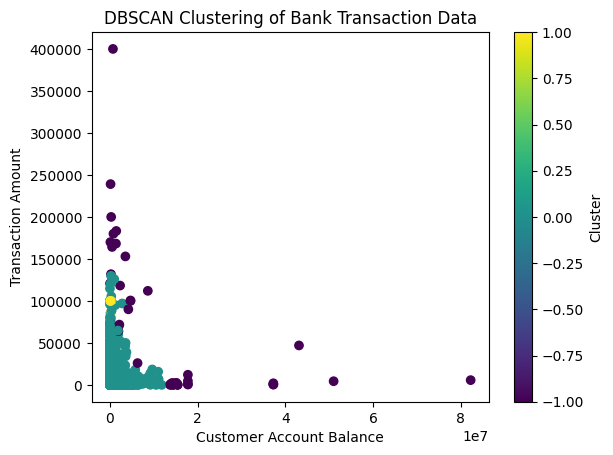

In [21]:
# CustAccountBalance vs Transaction Amount
plt.scatter(X_sample[0], X_sample[1], c=clusters, cmap='viridis')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

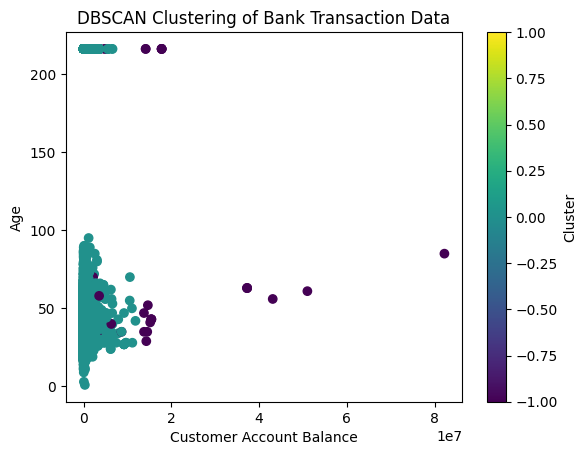

In [22]:
# CustAccountBalance vs Age
plt.scatter(X_sample[0], X_sample[2], c=clusters, cmap='viridis')
plt.xlabel('Customer Account Balance')
plt.ylabel('Age')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

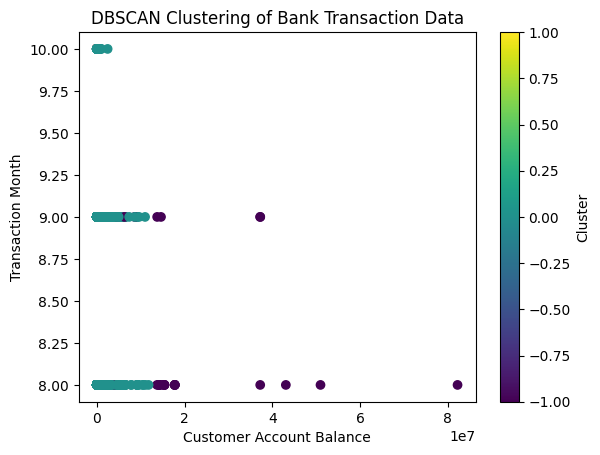

In [23]:
#  CustAccountBalance vs Transaction Month
plt.scatter(X_sample[0], X_sample[3], c=clusters, cmap='viridis')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Month')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

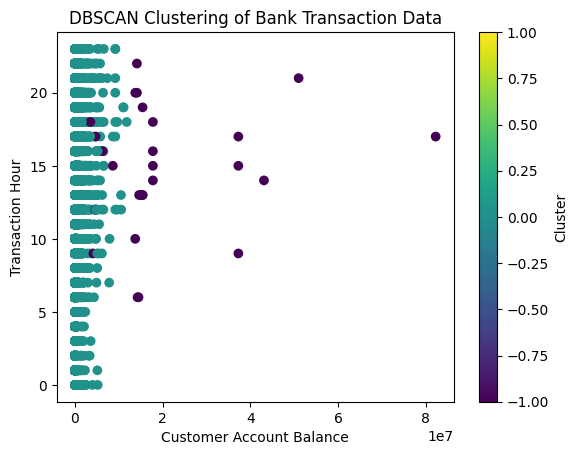

In [24]:
# CustAccountBalance vs Transaction Hour
plt.scatter(X_sample[0], X_sample[4], c=clusters, cmap='viridis')
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Hour')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

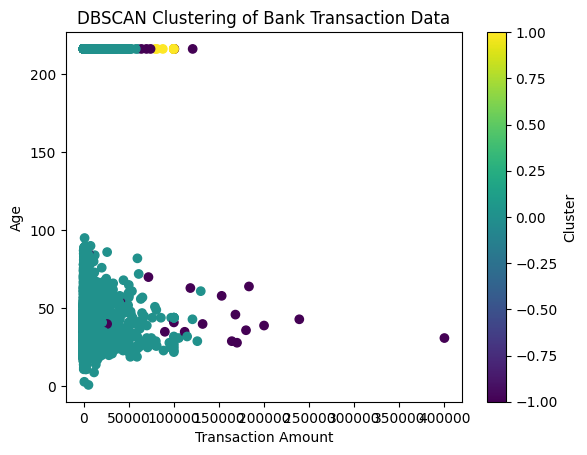

In [25]:
# Transaction Amount vs Age
plt.scatter(X_sample[1], X_sample[2], c=clusters, cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

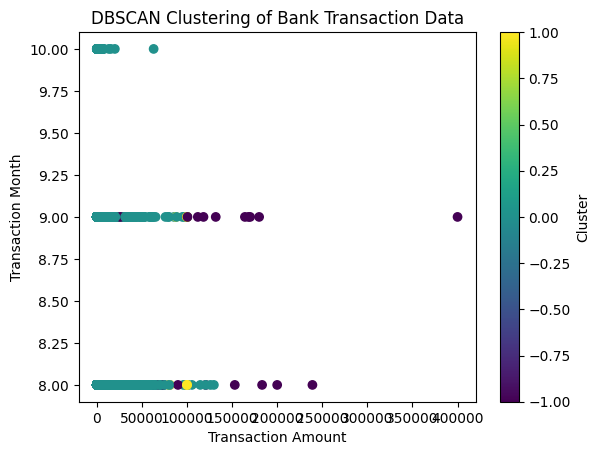

In [26]:
# Transaction Amount vs Transaction Month
plt.scatter(X_sample[1], X_sample[3], c=clusters, cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Month')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

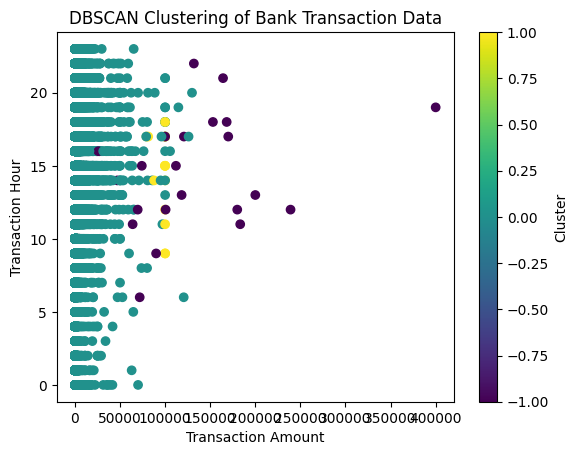

In [27]:
# Transaction Amount vs Transaction Hour
plt.scatter(X_sample[1], X_sample[4], c=clusters, cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

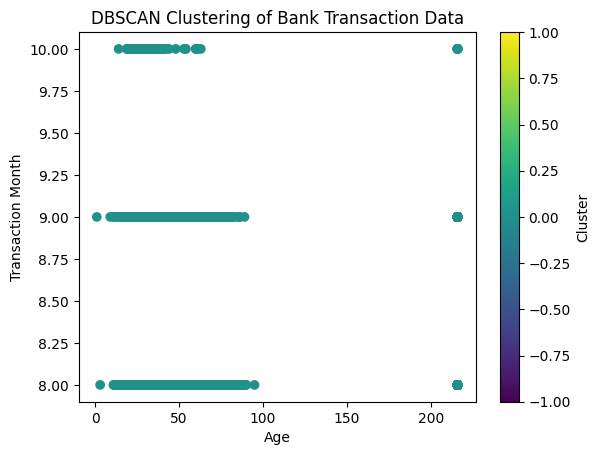

In [28]:
# Age vs Transaction Month
plt.scatter(X_sample[2], X_sample[3], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Transaction Month')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

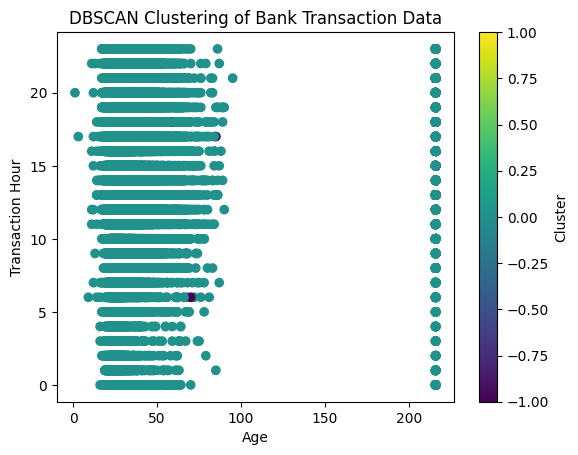

In [29]:
# Age vs Transaction Hour
plt.scatter(X_sample[2], X_sample[4], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Transaction Hour')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

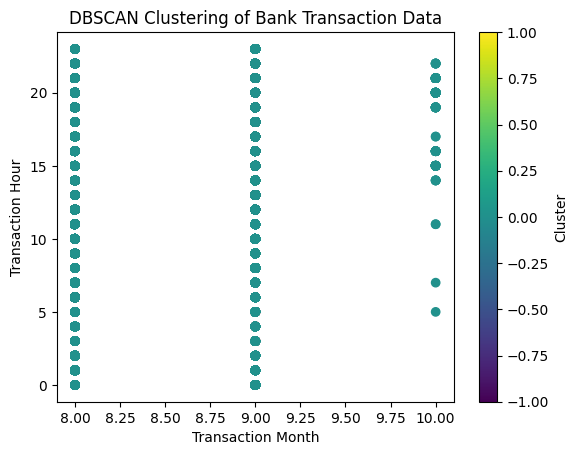

In [30]:
# Transaction Month vs Transaction Hour
plt.scatter(X_sample[3], X_sample[4], c=clusters, cmap='viridis')
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Hour')
plt.title('DBSCAN Clustering of Bank Transaction Data')
plt.colorbar(label='Cluster')
plt.show()

In [31]:
#--------------------------------Gaussian Mixture Model Algorithm (Distribution Based Clustering)------------------------------------

In [32]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

labels = gmm.predict(scaled_features)
frame = pd.DataFrame(scaled_features)
frame['cluster'] = labels
frame.columns = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age', 'Tmonth', 'TransactionHour', 'cluster']

color=['blue','green', 'red', 'purple']

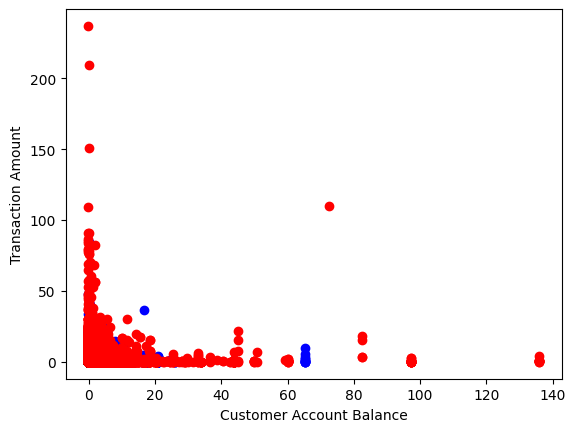

In [33]:
# CustAccountBalance vs Transaction Amount
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["CustAccountBalance"],data_X["TransactionAmount (INR)"],c=color[k])
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount')
plt.show()

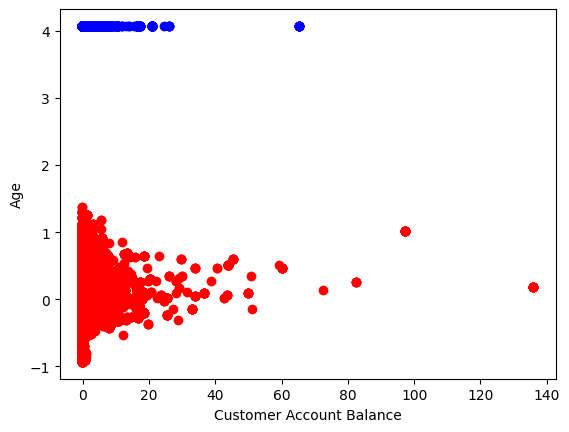

In [34]:
# CustAccountBalance vs Age
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["CustAccountBalance"],data_X["Age"],c=color[k])
plt.xlabel('Customer Account Balance')
plt.ylabel('Age')
plt.show()

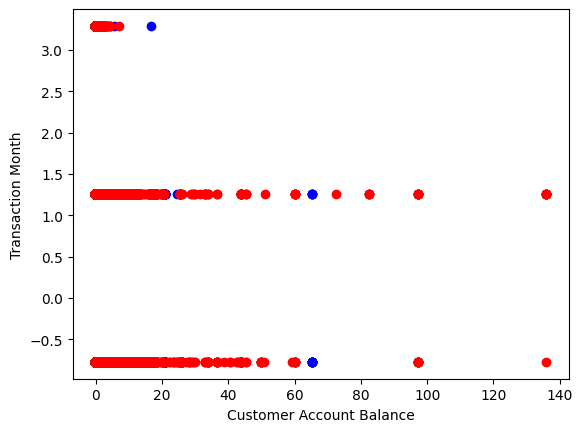

In [35]:
# CustAccountBalance vs Transaction Month
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["CustAccountBalance"],data_X["Tmonth"],c=color[k])
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Month')
plt.show()

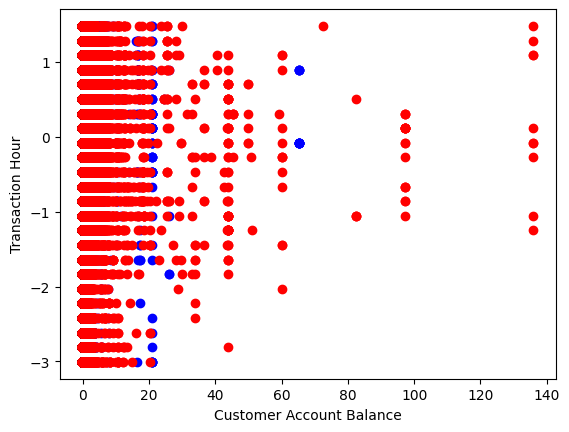

In [36]:
# CustAccountBalance vs Transaction Hour
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["CustAccountBalance"],data_X["TransactionHour"],c=color[k])
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Hour')
plt.show()

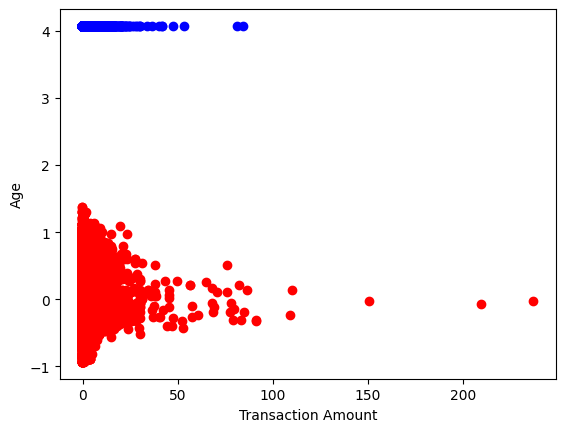

In [37]:
# Transaction Amount vs Age
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["TransactionAmount (INR)"],data_X["Age"],c=color[k])
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.show()

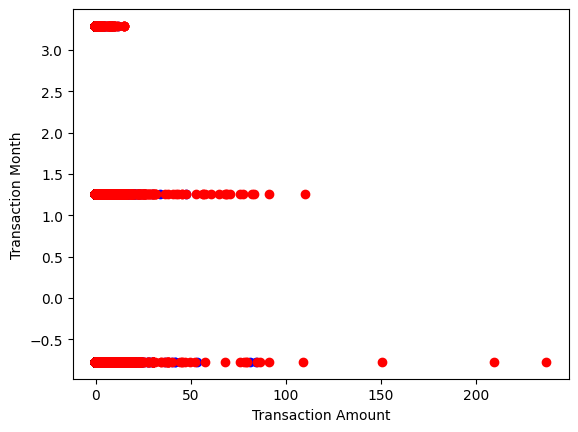

In [38]:
# Transaction Amount vs Transaction Month
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["TransactionAmount (INR)"],data_X["Tmonth"],c=color[k])
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Month')
plt.show()

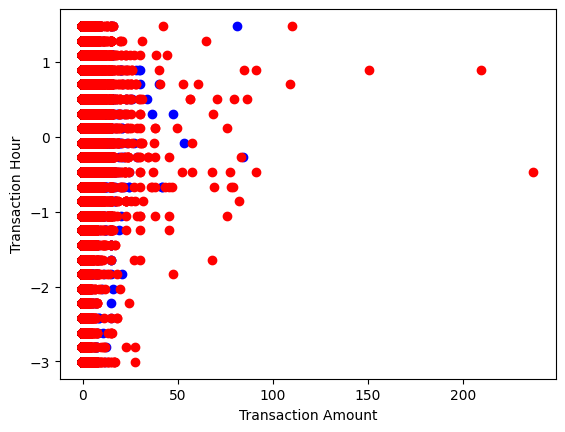

In [39]:
# Transaction Amount vs Transaction Hour
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["TransactionAmount (INR)"],data_X["TransactionHour"],c=color[k])
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.show()

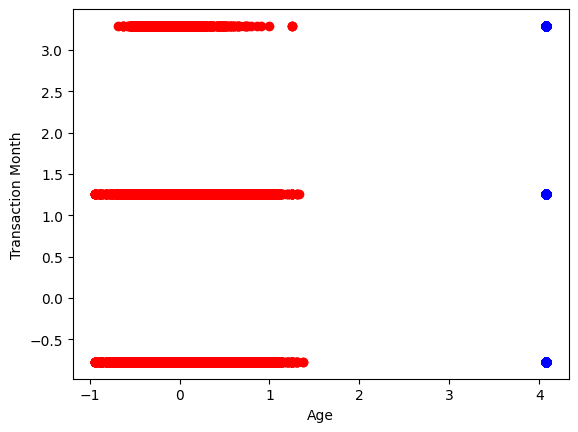

In [40]:
# Age vs Transaction Month
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["Age"],data_X["Tmonth"],c=color[k])
plt.xlabel('Age')
plt.ylabel('Transaction Month')
plt.show()

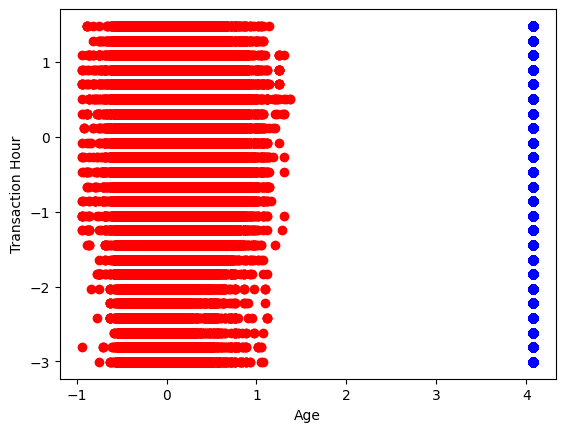

In [41]:
# Age vs Transaction Hour
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["Age"],data_X["TransactionHour"],c=color[k])
plt.xlabel('Age')
plt.ylabel('Transaction Hour')
plt.show()

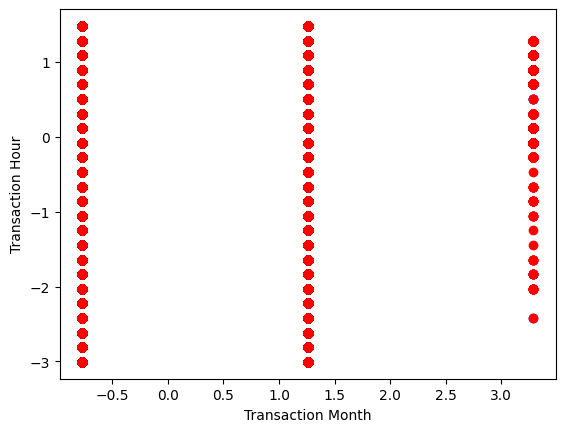

In [42]:
# Transaction Month vs Transaction Hour
for k in range(0,4):
    data_X = frame[frame["cluster"]==k]
    plt.scatter(data_X["Tmonth"],data_X["TransactionHour"],c=color[k])
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Hour')
plt.show()

In [43]:
#-----------------------BIRCH Algorithm (Hierarchical Based Clustering)-----------------------------------

In [44]:
from sklearn.cluster import Birch

bclust=Birch(branching_factor=200, threshold = 1).fit(scaled_features)

labels = bclust.predict(scaled_features)
#

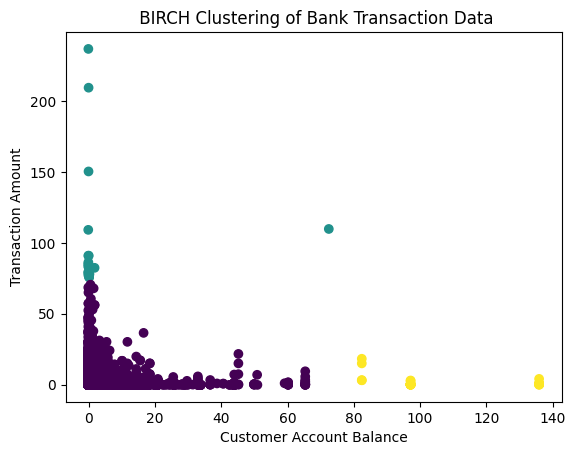

In [45]:
# CustAccountBalance vs Transaction Amount
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=labels)
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Amount')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

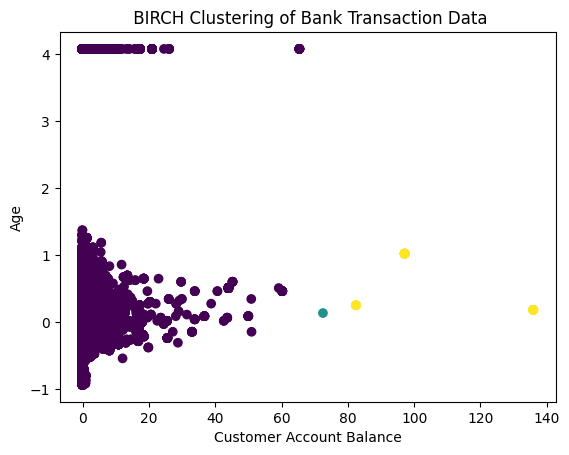

In [46]:
# CustAccountBalance vs Age
plt.scatter(scaled_features[:,0], scaled_features[:,2], c=labels)
plt.xlabel('Customer Account Balance')
plt.ylabel('Age')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

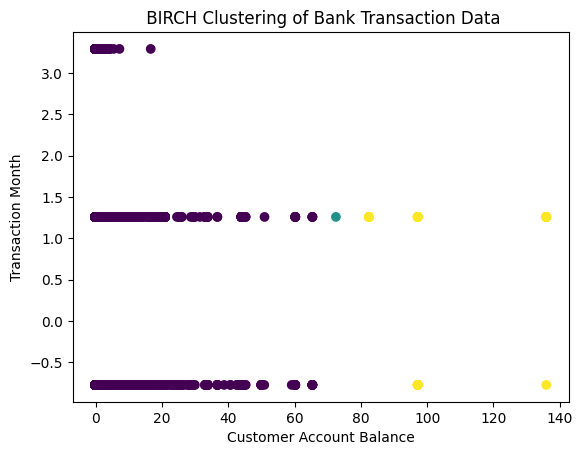

In [47]:
#  CustAccountBalance vs Transaction Month
plt.scatter(scaled_features[:,0], scaled_features[:,3], c=labels)
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Month')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

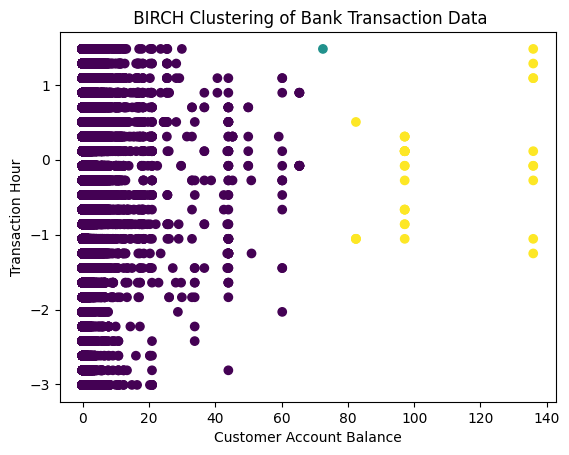

In [48]:
# CustAccountBalance vs Transaction Hour
plt.scatter(scaled_features[:,0], scaled_features[:,4], c=labels)
plt.xlabel('Customer Account Balance')
plt.ylabel('Transaction Hour')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

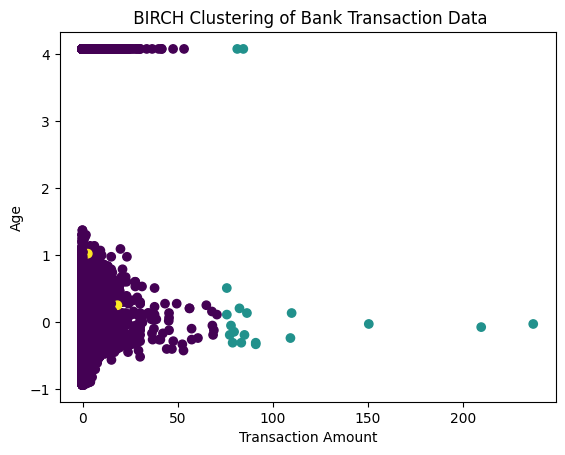

In [49]:
# Transaction Amount vs Age
plt.scatter(scaled_features[:,1], scaled_features[:,2], c=labels)
plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

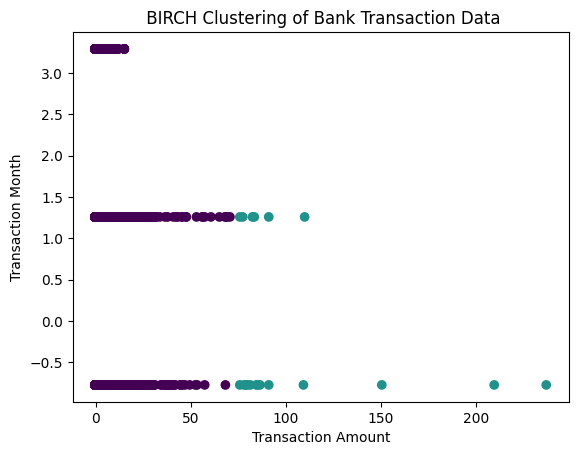

In [50]:
# Transaction Amount vs Transaction Month
plt.scatter(scaled_features[:,1], scaled_features[:,3], c=labels)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Month')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

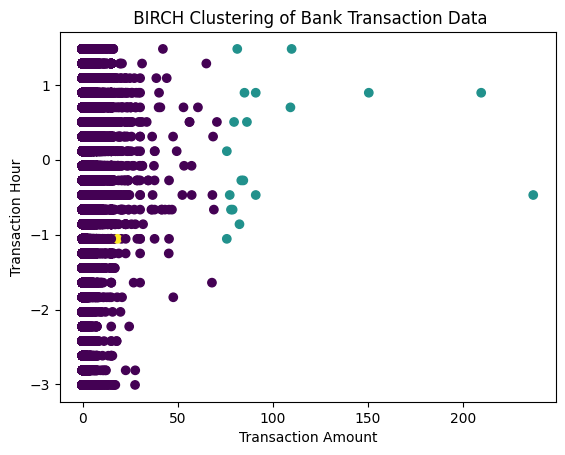

In [51]:
# Transaction Amount vs Transaction Hour
plt.scatter(scaled_features[:,1], scaled_features[:,4], c=labels)
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

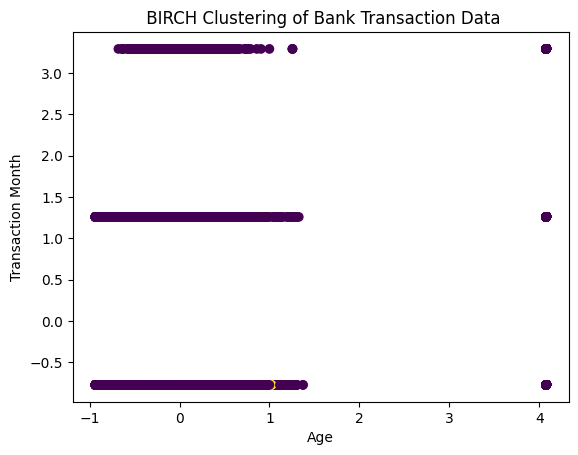

In [52]:
# Age vs Transaction Month
plt.scatter(scaled_features[:,2], scaled_features[:,3], c=labels)
plt.xlabel('Age')
plt.ylabel('Transaction Month')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

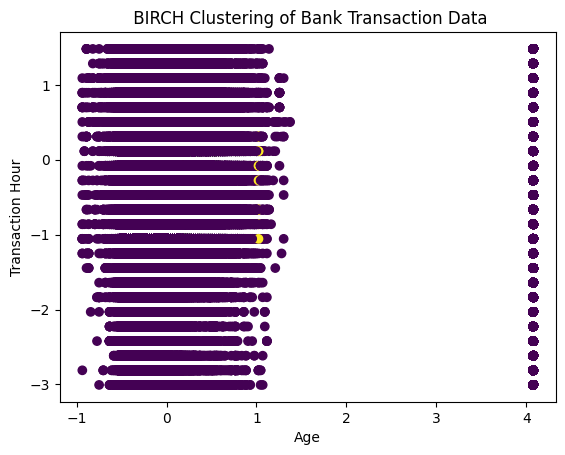

In [53]:
# Age vs Transaction Hour
plt.scatter(scaled_features[:,2], scaled_features[:,4], c=labels)
plt.xlabel('Age')
plt.ylabel('Transaction Hour')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()

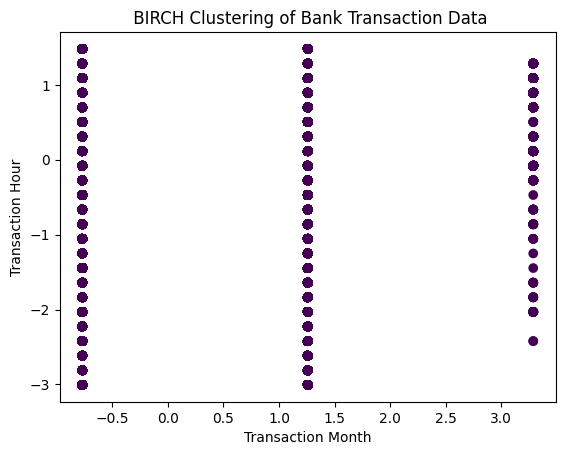

In [54]:
# Transaction Month vs Transaction Hour
plt.scatter(scaled_features[:,3], scaled_features[:,4], c=labels)
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Hour')
plt.title(' BIRCH Clustering of Bank Transaction Data')
plt.show()